In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from iminuit import Minuit
from scipy import integrate

<BarContainer object of 20 artists>

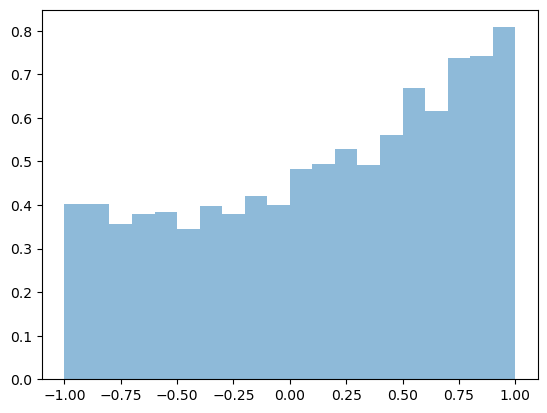

In [12]:
samples = np.genfromtxt("samples.csv", delimiter=",")

Nbins= 20
x_range = (-1, 1)
counts, edges = np.histogram(samples, bins=Nbins, range=x_range, density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2
plt.bar(bin_centers, counts, width=edges[1] - edges[0], alpha=0.5, label='Sampled Distribution')

In [ ]:
def ln_likelihood(vals, func, a, b):
    return -np.sum(np.log(func(vals, a, b)))

def function(x, a, b):
    return 1 + a*x + b*x**2




# Both of these functions are correct, but the second one is more general and will work for any values of a and b, while the first one is hardcoded for specific values of a and b. Therefore, I will use the second function in the likelihood calculation.

def normalized_function(x, a, b):
    return 1/(2+2*b/3)*function(x, a, b)

def normalized_function(x,a,b):
    integral, _ = integrate.quad(lambda x: function(x, a, b), -1, 1)
    return function(x, a, b) / integral 

m = Minuit(lambda a,b: ln_likelihood(samples, normalized_function, a, b), a=0.5, b=0.5)
m.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6575                       │              Nfcn = 31               │
│ EDM = 2.66e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.500   │   0.031   │            │            │         │         │       │
│ 1 │ b    │   0.42    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000978   0.9e-3 │
│ b │   0.9e-3  0.00384 │
└───┴───────────────────┘

In [14]:
#uncertainties
print(f"Best fit parameters: a = {m.values['a']:.3f} ± {m.errors['a']:.3f}, b = {m.values['b']:.3f} ± {m.errors['b']:.3f}")

Best fit parameters: a = 0.500 ± 0.031, b = 0.423 ± 0.062
